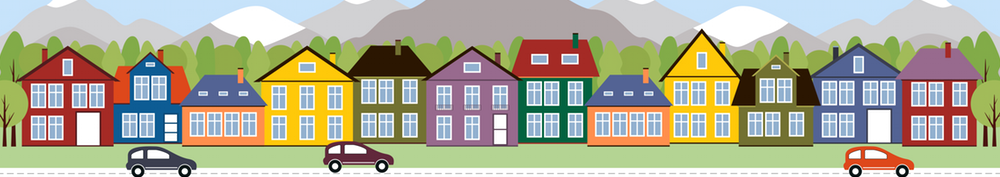

Time flies! You have now learned and (hopefully) mastered all the skills required to build a real-world ML regression model! These skills include:

- Exploratory data analysis (EDA)
- Data pre-processing and feature engineering: scaling, imputation, encoding...
- A suite of regression models: linear regression, trees, forests, ...
- Hyperparamter tuning: CV, GridSearch...
- Model evaluation

Now it is time to deploy these skills in the real world, build your first "real" ML project, and see how you perform against other data scientists from all over the world!

We will join this active Kaggle competition to predict house prices:


https://www.kaggle.com/c/house-prices-advanced-regression-techniques

You will find the detailed description of the competition from above web site, and can download the data directly there. 

**Requirements:**

- Please use this notebook to create your code, explanation, graphs, and results just like what you did for your homework.
- This is an individual project. You are free to discuss with your classmates but you should complete the project on your own (ie, you cannot copy code...).
- You should create a Kaggle account and submit the prediction of your model in Kaggle individually. Please add "SCU_" in front of your team name so that you can check how you rank among your classmates in the Leaderboard. However, you do not have to use your real name in your team name.
- You can submit your results multiple times in Kaggle. Therefore you are encouraged to submit your model, improve, then re-submit. It is a continuous learning process.
- **Please include a screenshot of your best Kaggle submission at the bottom of this notebook showing your rank and score in the leaderboard.**
- You are also encouraged to read discussion forums to learn and get your inspiration, but code copying is strictly forbidden.
- **Honor code: again, you cannot copy code, neither from classmates nor from any online discussion forums. We will check your code and you may be asked to present in class (so you need to be extremely familiar with your work)!**

### Good luck!

### <font color='Blue'>House Prices - Advanced Regression Techniques </font> 
**<font color='Blue'>Project Team Name: SCU_KirtivasanKirtana</font>**

<u />**Index:**<u />

1. Importing Libraries
2. Reading csv files into DataFrames
3. Data Description
4. Exploratory Data Analysis
   * Variable Identification
   * Uni-Variate Analysis
   * Bivariate Analysis 
   * Multicollinearity
   * Numerical and Categorical Features
5. Data Preprocessing
   * Imputing Missing Data
   * Normalizing Target Variable
   * Scaling
   * Encoding
6. Suite of Regression Models
   * Selection of Regression Model
7. Model training 
   1. Gradient Boosting Regressor
      * Model train
      * Model Evaluation
      * Hyperparameter Tuning
      * Retrain model with tuned parameters
      * Final model Evaluation
      * Plot visualizations of ground truths and predicted values
   2. XGBoost Regressor
      * Model train
      * Model Evaluation
      * Feature Importance
      * Hyperparameter Tuning
      * Retrain model with tuned parameters
      * Final model Evaluation
      * Plot visualizations of ground truths and predicted values
8. Write final predicted values of Saleprice to submission.csv

In [1]:
%autosave 1

Autosaving every 1 seconds


In [2]:
import warnings
warnings.filterwarnings("ignore")

### *Importing libraries*

In [3]:
# your code starts here:

import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

In [5]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)

### *Reading train.csv and test.csv into DataFrames*

In [6]:
train_raw = pd.read_csv('train.csv')
train_raw.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
test_raw = pd.read_csv('test.csv')
test_raw.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
# Dimensions of given train and test data

print("Shape of train and test data: " + str(train_raw.shape) + " " + str(test_raw.shape))

Shape of train and test data: (1460, 81) (1459, 80)


### *Data Description* 


- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- LotShape: General shape of property
- Utilities: Type of utilities available	
- LotConfig: Lot configuration	
- Neighborhood: Physical locations within Ames city limits
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallCond: Rates the overall condition of the house
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
- MasVnrArea: Masonry veneer area in square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- GarageYrBlt: Year garage was built
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- YrSold: Year Sold (YYYY)
- PoolArea: Pool area in square feet
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- MSZoning: Identifies the general zoning classification of the sale

### *Exploratory Data Analysis*

##### 1. Variable Identification:

Below are the features from the given dataset. 
- ***Predictor variable*** is the name given to an independent variable used in regression analyses. The predictor variable provides information on an associated dependent variable regarding a particular outcome. Predictor variables could include features like "Lotfrontage", "LotArea", "LotShape", "BldgType", "HouseStyle", "Yearbuilt", "Neighborhood" and so on.
- ***Target variable*** is the variable whose values are to be modeled and predicted by other variables. It is analogous to the dependent variable (i.e., the variable on the left of the equal sign) in linear regression. Here the target variable is "SalePrice".

Below are the features of the training set:

In [9]:
train_raw.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

##### 2. Uni-variate Analysis

Now we willl explore each variable one by one. Method to perform uni-variate analysis will depend on whether the variable type is categorical or continuous.

<u />*Continuous Variable:*<u />

In [10]:
# Descriptive Statistics Summary of Target Variable:

train_raw['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [11]:
# Skewness and Kurtosis:

Skewness: Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.

Kurtosis: Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers. A uniform distribution would be the extreme case. 

The histogram is an effective graphical technique for showing both the skewness and kurtosis of data set.

In [12]:
%matplotlib inline 
import matplotlib as plt

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

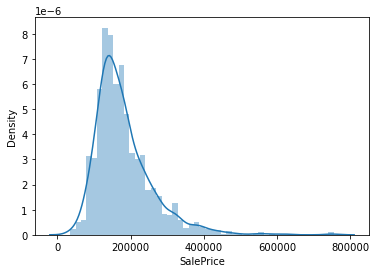

In [13]:
# Histogram plot of Target Variable:

sns.distplot(train_raw['SalePrice'])

In [14]:
print("Skewness: " + str(train_raw.SalePrice.skew()))
print(" ")
print("Kurtosis: " + str(train_raw.SalePrice.kurt()))

Skewness: 1.8828757597682129
 
Kurtosis: 6.536281860064529


- The normal distribution helps to know a skewness. When we talk about normal distribution, data is symmetrically distributed. The symmetrical distribution has zero skewness as all measures of a central tendency lies in the middle.
- There are two types of skewness: Positive skewness and Negative skewness
- From the above we can suggest that the target variable is Postively skewed. A positively skewed distribution is a type of distribution where the mean, median, and mode of the distribution are positive rather than negative or zero.

When data is skewed, the tail region may behave as an outlier for the statistical model, and outliers unsympathetically affect the model’s performance especially regression-based models. Some statistical models are hardy to outliers like Tree-based models, but it will limit the possibility to try other models. So there is a necessity to transform the skewed data to close enough to a Normal distribution which we will do later in the notebook.

In [15]:
# Taking log scale to reveal more details:

array([[<AxesSubplot:title={'center':'SalePrice'}>]], dtype=object)

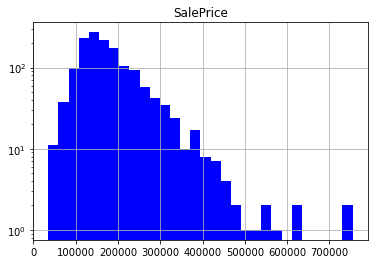

In [16]:
train_raw.hist('SalePrice', bins = 30, log = True, color = 'blue')

###### Logarithmic transformation

- Logarithmic transformation is a convenient means of transforming a highly skewed variable into a more normalized dataset. When modeling variables with non-linear relationships, the chances of producing errors may also be skewed negatively. 
- In theory, we want to produce the smallest error possible when making a prediction, while also taking into account that we should not be overfitting the model. Overfitting occurs when there are too many dependent variables in play that it does not have enough generalization of the dataset to make a valid prediction. 
- It is useful if and only if the distribution of the target variable is right-skewed which can be observed by the above histogram plot. This occurs when there are outliers that can't be filtered out as they are important to the model.

<AxesSubplot:ylabel='Frequency'>

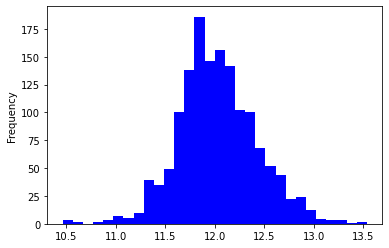

In [17]:
# Taking Log of the values to remove the skewness

train_raw.SalePrice.map(np.log).plot(kind='hist', bins=30, color = 'blue')

In [18]:
# Skewness after normalizing the SalePrice Values

train_raw.SalePrice.map(np.log).skew()

0.12133506220520406

In [19]:
# Kurtosis after normalizing the SalePrice Values

train_raw.SalePrice.map(np.log).kurt()

0.8095319958036296

<u />*Categorical Variables:*<u />

In [20]:
# Descriptive Summary of Categorical Variable: Neighborhood

train_raw.Neighborhood.describe()

count      1460
unique       25
top       NAmes
freq        225
Name: Neighborhood, dtype: object

<AxesSubplot:xlabel='Neighborhood'>

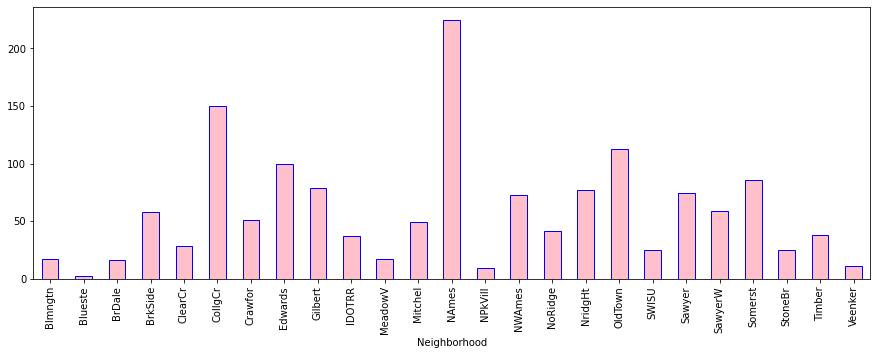

In [21]:
# Visualization of count of each category in Neighborhood

train_raw.groupby('Neighborhood')['Neighborhood'].count().plot(kind = 'bar', color = 'pink', figsize = (15, 5), \
                                                              edgecolor='blue')

In [22]:
# Descriptive Summary of Categorical Variable: LotShape

train_raw.LotShape.describe()

count     1460
unique       4
top        Reg
freq       925
Name: LotShape, dtype: object

<AxesSubplot:ylabel='LotShape'>

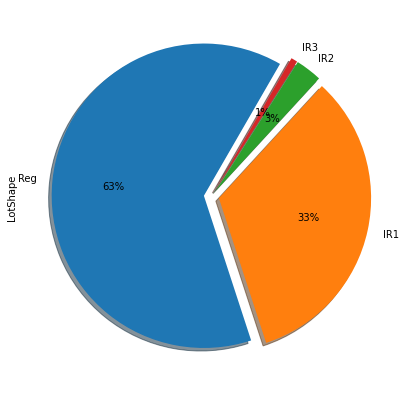

In [23]:
# Visualization of count and count% of each category in LotShape 

explode = (0.05, 0.05, 0.05, 0.05)
train_raw.LotShape.value_counts().plot(kind = 'pie',autopct='%1.0f%%',figsize = (7,7), explode=explode, \
                                       shadow = True, startangle=60)

In [24]:
# Descriptive Summary of Categorical Variable: Alley

train_raw.Alley.describe()

count       91
unique       2
top       Grvl
freq        50
Name: Alley, dtype: object

<AxesSubplot:xlabel='Alley'>

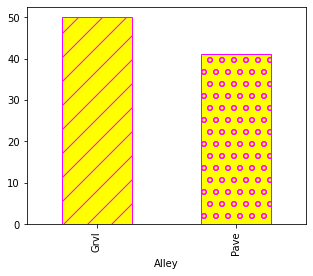

In [25]:
# Visualization of count of each category in Alley

train_raw.groupby('Alley')['Alley'].count().plot(kind = 'bar', color = 'yellow', figsize = (5, 4), \
                                                              edgecolor='magenta', hatch = ["/" , "o"])

##### 3. Bivariate Analysis

Bi-variate Analysis finds out the relationship between two variables. We can perform bi-variate analysis for any combination of categorical and continuous variables. The combination can be: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous. Different methods are used to tackle these combinations during analysis process.

<u />*Continuous & Continuous:*<u /> 

*GrLivArea & SalePrice*

In [26]:
# Plot to visualize relationship between GrLivArea and SalePrice

import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
N = len(train_raw)
colors = np.random.rand(N)

Text(0.5, 0, 'Living Area')

Text(0, 0.5, 'Sale price')

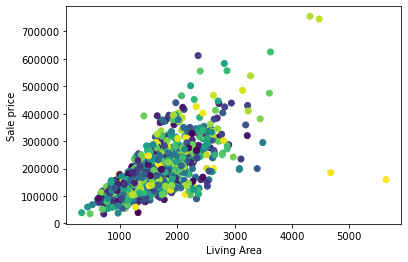

In [28]:
plt.scatter(train_raw.GrLivArea, train_raw.SalePrice, c = colors, marker = "o")
plt.xlabel('Living Area')
plt.ylabel('Sale price')
plt.show()

***From the above plot we can say that the relation between one of the input/predictor varaibles "GrLivArea" and the target variable "SalePrice" is a linear relationship.***

<u />*Continuous & Continuous:*<u /> 

*TotalBsmtSF & SalePrice*

In [29]:
# An interactive visualization of TotalBsmtSF and Saleprice. 
# Go ahead and play with the graph: zoom in, zoom out, change colors

from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColorPicker
from bokeh.layouts import column

In [30]:
output_notebook()

Loading BokehJS ...

In [31]:
p = figure(width=800, height=400)

# add a circle renderer with a size, color, and alpha
circle = p.circle(train_raw.TotalBsmtSF, train_raw.SalePrice, size=20, color="blue", alpha=0.3)

picker = ColorPicker(title="Circle Color")
picker.js_link('color', circle.glyph, "fill_color")

# show the results
show(column(p, picker))

***From the above interactive plot we can say that the relation between one of the input/predictor varaibles "TotalBsmtSF" and the target variable "SalePrice" is a strong linear relationship.***

<u />*Categorical & Continuous:*<u /> 

*Neighborhood & SalePrice*

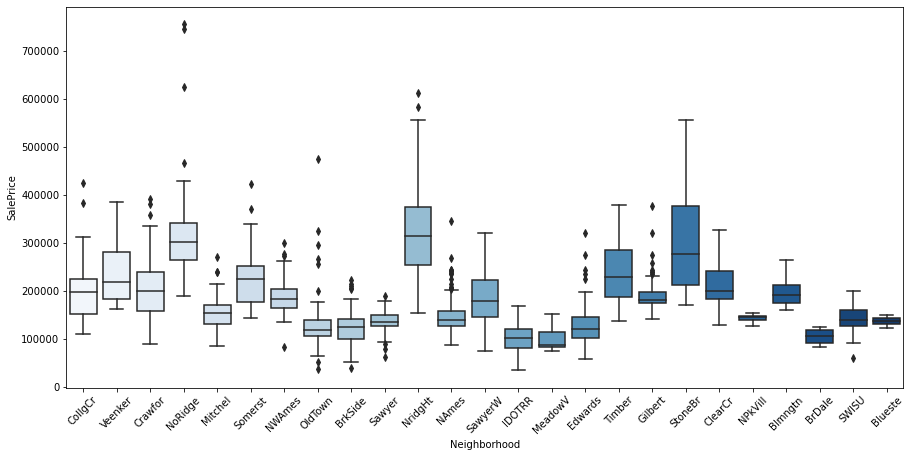

In [32]:
# Box plot to visualize Neighborhood v/s SalePrice

data = pd.concat([train_raw['SalePrice'], train_raw['Neighborhood']], axis=1)
f, ax = plt.subplots(figsize=(15, 7))
fig = sns.boxplot(x='Neighborhood', y="SalePrice", data=data, palette="Blues")
plt.xticks(rotation = 45);

***From the above plot we can see that Neighborhood like NoRidge, NridgHt, Timber, StoneBar have better average SalePrice when copared to the rest of the Neighborhood categories.***

*OverallQual & SalePrice*

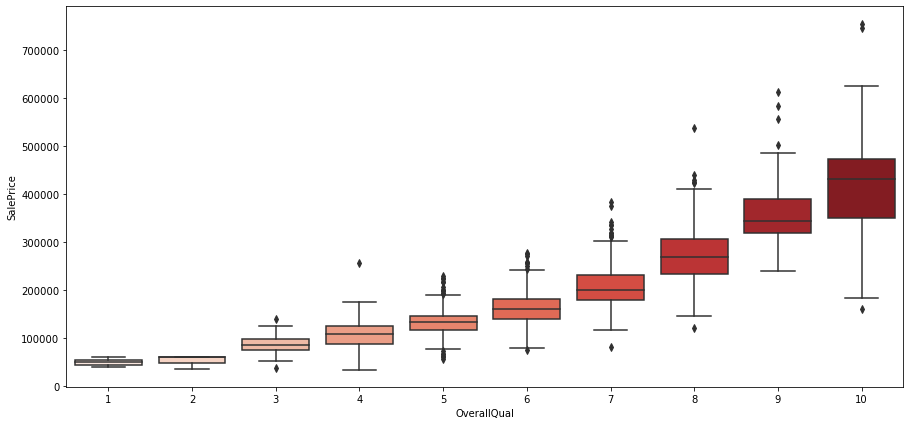

In [33]:
# Box plot to visualize OverallQual v/s SalePrice

data = pd.concat([train_raw['SalePrice'], train_raw['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(15, 7))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data, palette="Reds");

***From the above Boxplot we can infer that higher the "OverallQual", higher is the "SalePrice" for the house.***

##### 4. Correlation Matrix: Check for Multicollinearity

Multicollinearity is a statistical concept where several independent variables in a model are correlated. Two variables are considered to be perfectly collinear if their correlation coefficient is +/- 1.0. Multicollinearity among independent variables will result in less reliable statistical inferences. Hence, goal is to remove some highly correlated features.

In [34]:
features = ['LotFrontage','LotArea','OverallQual','OverallCond','YearRemodAdd','MasVnrArea','BsmtUnfSF','TotalBsmtSF'\
            ,'1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','TotRmsAbvGrd','GarageYrBlt','GarageCars','GarageArea'\
            ,'YrSold','YearBuilt','Neighborhood','LotShape','BldgType','HouseStyle', 'LotConfig'\
            ,'FullBath','HalfBath','MSZoning','SalePrice']

<AxesSubplot:>

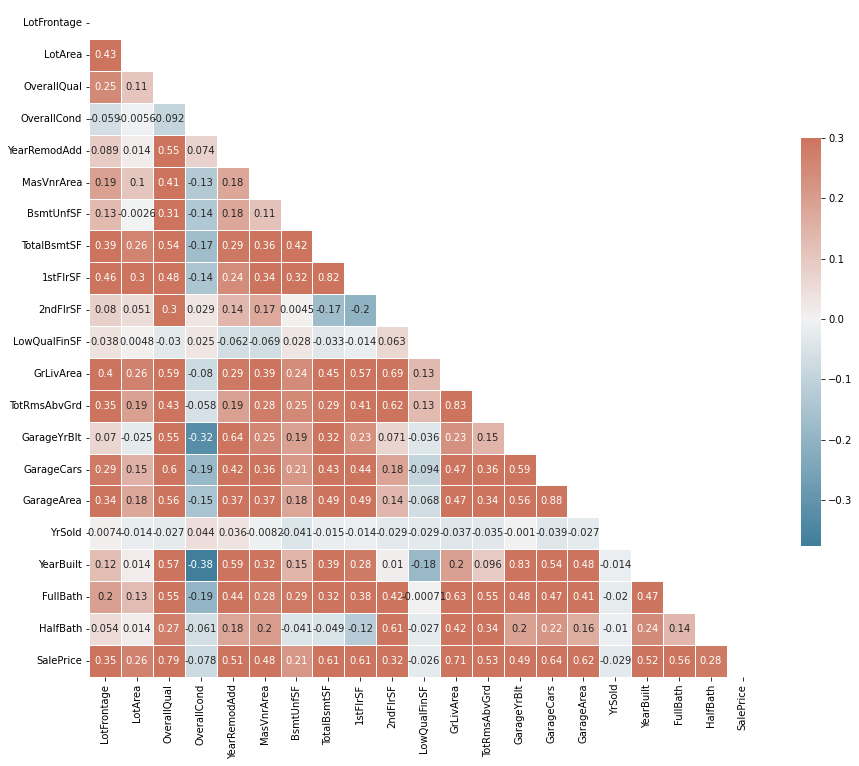

In [35]:
%matplotlib inline
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = train_raw[features].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [36]:
corr = train_raw[features].corr()
corr[corr < 1].stack().nlargest(20)[::2]

GarageCars    GarageArea      0.882475
GarageYrBlt   YearBuilt       0.825667
GrLivArea     TotRmsAbvGrd    0.825489
TotalBsmtSF   1stFlrSF        0.819530
OverallQual   SalePrice       0.790982
GrLivArea     SalePrice       0.708624
2ndFlrSF      GrLivArea       0.687501
YearRemodAdd  GarageYrBlt     0.642277
GarageCars    SalePrice       0.640409
GrLivArea     FullBath        0.630012
dtype: float64

We can see high correlation between **"GarageArea"** and **"GarageCars"** which is about **88%**. Similarly between **"YearBuilt"** and **"GarageYrBlt"** & **"GrLivArea"** and **"TotRmsAbvGrd"** have about **83%** collinearity. 
- One of the correlated columns must be removed while performing Linear Regression as this model does not handle multi-collinearity. 
- But in case of decision trees, they are by nature immune to multi-collinearirty. Since boosted trees use individual decision trees, they also are unaffected by multi-collinearity. 
- However, its a good practice to remove any redundant features from any dataset used for training, irrespective of the model's algorithm. 
- Hence, we can remove "YearBuilt" from our features list before feeding into the model to train it. 

##### 5. Numerical and Categorical Features

In [37]:
features = ['LotFrontage','LotArea','OverallQual','OverallCond','YearRemodAdd','MasVnrArea','BsmtUnfSF','TotalBsmtSF'\
            ,'1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','TotRmsAbvGrd','GarageYrBlt','GarageCars','GarageArea'\
            ,'YrSold','Neighborhood','LotShape','BldgType','HouseStyle', 'LotConfig','FullBath','HalfBath',\
            'SalePrice']

numerical = ['LotFrontage','LotArea','OverallQual','OverallCond','YearRemodAdd','MasVnrArea','BsmtUnfSF',
        'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','TotRmsAbvGrd','GarageYrBlt',
        'GarageCars','GarageArea','YrSold']

categorical = ['Neighborhood','LotShape','BldgType','HouseStyle', 'LotConfig', 'FullBath','HalfBath']

target = 'SalePrice'

In [38]:
train = train_raw[features].copy()

test = test_raw[numerical + categorical].copy()

In [39]:
train.shape

test.shape

(1460, 25)

(1459, 24)

### *Data pre-processing*

##### 1. Imputing Missing Data

In [40]:
# Check missing data in train and test

print("Train missing values: " + str(train.isna().sum().sum()))

print("Test missing values: " + str(test.isna().sum().sum()))

Train missing values: 348
Test missing values: 324


In [41]:
# Train set missing values for each feature

missing = train.isna().sum().sort_values(ascending=False)

percent = (train.isna().sum()/train.isna().count()).sort_values(ascending=False)

missing_train = pd.concat([missing, percent], axis=1, keys=['Total', 'Percent'])

missing_train.head(10)

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
HalfBath,0,0.000000
FullBath,0,0.000000
LotConfig,0,0.000000
HouseStyle,0,0.000000
BldgType,0,0.000000
LotShape,0,0.000000
Neighborhood,0,0.000000


In [42]:
# Imputing the missing data in LotFrontage with it's Average value from train dataset

train.LotFrontage.fillna(value = train.LotFrontage.mean(), inplace = True)

In [43]:
# Imputing the missing data in GarageYrBlt with 0

train.GarageYrBlt.fillna(value = 0, inplace = True)

In [44]:
# Imputing the missing data in MasVnrArea with it's Average value from train dataset

train.MasVnrArea.fillna(value = train.MasVnrArea.mean(), inplace = True)

In [45]:
# Check for missing values after cleaning

print("Train missing values: " + str(train.isna().sum().sum()))

Train missing values: 0


In [46]:
# Test set missing values for each feature

missing = test.isna().sum().sort_values(ascending=False)

percent = (test.isna().sum()/test.isna().count()).sort_values(ascending=False)

missing_train = pd.concat([missing, percent], axis=1, keys=['Total', 'Percent'])

missing_train.head(10)

,Total,Percent
LotFrontage,227,0.155586
GarageYrBlt,78,0.053461
MasVnrArea,15,0.010281
GarageCars,1,0.000685
BsmtUnfSF,1,0.000685
TotalBsmtSF,1,0.000685
GarageArea,1,0.000685
FullBath,0,0.000000
LotConfig,0,0.000000
HouseStyle,0,0.000000


In [47]:
# Imputing the missing data in LotFrontage with it's Average value from train dataset

test.LotFrontage.fillna(value = train.LotFrontage.mean(), inplace = True)

# Imputing the missing data in LotFrontage with it's Average value from train dataset

test.LotFrontage.fillna(value = train.LotFrontage.mean(), inplace = True)

# Imputing the missing data in MasVnrArea with it's Average value from train dataset

test.MasVnrArea.fillna(value = train.MasVnrArea.mean(), inplace = True)

# Imputing the GarageYrBlt with 0 

test.GarageYrBlt.fillna(value = 0, inplace = True)

# Imputing GarageCars with 0 assuming there is no Garage

test.GarageCars.fillna(value = 0, inplace = True)

# Imputing GarageArea with 0 assuming there is no Garage 

test.GarageArea.fillna(value = 0, inplace = True)

# Imputing the missing data in BsmtUnfSF with it's Average value from train dataset

test.BsmtUnfSF.fillna(value = train.BsmtUnfSF.mean(), inplace = True)

# Imputing the missing data in TotalBsmtSF with it's Average value from train dataset

test.TotalBsmtSF.fillna(value = train.TotalBsmtSF.mean(), inplace = True)

In [48]:
# Check for missing values after cleaning 

print("Train missing values: " + str(train.isna().sum().sum()))

Train missing values: 0


##### 2. Feature Engineering

In [49]:
# Forming X_train, X_test, y_train from train_raw and test_raw dataset after selecting required features

X_train = train[numerical + categorical]
y_train = train[target]
X_test = test[numerical + categorical]

In [50]:
# Checking the dimensions of train and test sets

X_train.shape
y_train.shape
X_test.shape

(1460, 24)

(1460,)

(1459, 24)

***Normalize the Distribution of SalePrice variable:*** <br />
In literature, acceptable values for skewness are between -0.5 and 0.5 while -2 and 2 for Kurtosis. And we observed previously that this was Positvely skewed (right-skewed). Now we take the log transform of the target variable. 

In [51]:
y_train = np.log1p(y_train.values)

In [52]:
# Log-Transformation of target variable to removed skewness before fitting and training model

y_train

array([12.24769912, 12.10901644, 12.31717117, ..., 12.49313327,
       11.86446927, 11.90159023])

***Scaling and Encoding***

*Scaling:* <br />
StandardScaler - Standardize features by removing the mean and scaling to unit variance. Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).

*Encoding:* <br />
OneHotEncoder - Onehot Encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction. The categorical value represents the numerical value of the entry in the dataset. The output will be a sparse matrix where each column corresponds to one possible value of one feature

In [53]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [54]:
scaler = MinMaxScaler()
enc = OneHotEncoder(handle_unknown='ignore')

In [55]:
clt = ColumnTransformer(transformers=[('num', scaler, numerical), 
                                      ('cat', enc, categorical)])

### *Regression Models*

##### 1. Selection of Regression model

- A Good Model is not the one that gives accurate predictions on the known data or training data but the one which gives good predictions on the new data and avoids overfitting and underfitting.

- Overfitting occurs when a statistical model or machine learning algorithm captures the noise of the data. Intuitively, overfitting occurs when the model or the algorithm fits the data too well. Overfitting a model result in good accuracy for training data set but poor results on new data sets. Such a model is not of any use in the real world as it is not able to predict outcomes for new cases.

- Underfitting occurs when a statistical model or machine learning algorithm cannot capture the underlying trend of the data. Intuitively, underfitting occurs when the model or the algorithm does not fit the data well enough. Underfitting is often a result of an excessively simple model. 

How to tackle Problem of Overfitting? The answer is Cross Validation.
cross_val_score - Evaluate a score by cross-validation.
 1. Partition the data into a number of subsets
 2. Hold out a set at a time and train the model on remaining set
 3. Test model on hold out set
 4. Repeat process for each subset of dataset

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

In [57]:
pipelines = []

pipelines.append(('Linear Regressor', Pipeline([('preprocessor', clt),\
                                                ('LR',LinearRegression())])))

pipelines.append(('Ridge Regressor', Pipeline([('preprocessor', clt),\
                                               ('Ridge', Ridge())])))

pipelines.append(('K-Nearest Neighbors', Pipeline([('preprocessor', clt),\
                                                   ('KNN', KNeighborsRegressor())])))

pipelines.append(('DecisionTree Regressor', Pipeline([('preprocessor', clt),\
                                                      ('CART', DecisionTreeRegressor())])))

pipelines.append(('RandomForest Regressor', Pipeline([('preprocessor', clt),\
                                                      ('rfr', RandomForestRegressor())])))

pipelines.append(('Gradient Boosting Regressor', Pipeline([('preprocessor', clt),\
                                                           ('GBM', GradientBoostingRegressor())])))

pipelines.append(('XGB Regressor', Pipeline([('preprocessor', clt),\
                                             ('XGB', XGBRegressor())])))



results = []
names = []

for name, model in pipelines:
    scores = cross_val_score(model, X_train, y_train, cv = 10)
    results.append(scores.mean())
    names.append(name)
    print(name + " Train R2 score: " + str(scores.mean()))

Linear Regressor Train R2 score: 0.8472898100872766
Ridge Regressor Train R2 score: 0.8485716589254523
K-Nearest Neighbors Train R2 score: 0.7204568554609352
DecisionTree Regressor Train R2 score: 0.7001782305255647
RandomForest Regressor Train R2 score: 0.8624562220277474
Gradient Boosting Regressor Train R2 score: 0.8881767376930336
XGB Regressor Train R2 score: 0.8710636089269732


***R2 score: <br />***
Defined as ***(total variance explained by model) / total variance***. So if it is 100%, the two variables are perfectly correlated, i.e., with no variance at all. A low value would show a low level of correlation, meaning a regression model that is not valid.

In [58]:
r2 = pd.DataFrame(list(zip(names, results)),
               columns =['Regressor Models', 'R2 score'])

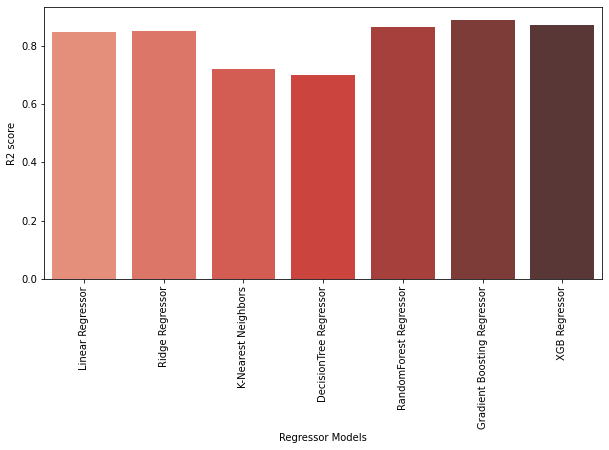

In [59]:
plt.rcParams["figure.figsize"] = [10,5]

sns.barplot(x = r2['Regressor Models'], y = r2['R2 score'], palette = "Reds_d")
plt.xticks(rotation=90);

#### 2. *Model Selection Process*

***Linear Regresssion Model:***
* Linear regression looks at a relationship between the mean of the dependent variable and the independent variables. Just as the mean is not a complete description of a single variable, linear regression is not a complete description of relationships among all other variables. 
* Linear regression is sensitive to outliers. Outliers can have huge effects on the regression. Multivariate outliers can influence the outcome of statistical analysis affecting the model’s performance especially regression-based models.
* Data must be independent. Linear regression assumes that the data are independent. In particular, there is no correlation between consecutive residuals. But we have highly correlated features, making this model **unfit for predicting** even though it has a good R2 score. 

*Thus if linear model contains many predictor variables or if these variables are correlated, the standard Ordinary Least Squares parameter estimates have large variance, thus making the model unreliable.*

***Lasso and Ridge Model:***
* Both methods allow to use correlated predictors, but they solve multicollinearity issue differently:
  1. In ridge regression, the coefficients of correlated predictors are similar
  2. In lasso, one of the correlated predictors has a larger coefficient, while the rest are (nearly) zeroed
* Lasso tends to do well if there are a small number of significant parameters and the others are close to zero and Ridge works well if there are many large parameters of about the same value. 
* Both of these models would reduce variance at the cost of introducing some bias, which 

*Thus to counter the problem of high variance and correlation issue in Linear regression, you can use regularization technique - a technique allowing to decrease this variance at the cost of introducing some bias.*

***Elastic Net:***
* Elastic Net, a convex combination of Ridge and Lasso. 
* Elastic Net first emerged as a result of critique on lasso, whose variable selection can be too dependent on data and thus is unstable. 

***K-Nearest Neighbors:***
* Does not work well with large dataset: In large datasets, the cost of calculating the distance between the new point and each existing points is huge which degrades the performance of the algorithm.
* Does not work well with high dimensions: The KNN algorithm doesn't work well with high dimensional data because with large number of dimensions, it becomes difficult for the algorithm to calculate the distance in each dimension.
* Need feature scaling: We need to do feature scaling (standardization and normalization) before applying KNN algorithm to any dataset. If we don't do so, KNN may generate wrong predictions.
* Sensitive to noisy data, missing values and outliers: KNN is sensitive to noise in the dataset. We need to manually impute missing values and remove outliers.

*Since, our dataset have high dimensions and has outliers, KNN would not be that best of a model to deply.*

***Decision Tree Regressor:***
* Decision tree will be unable to make accurate predictions if the data that are provided to split out a prediction are unrelated with the data that it has been trained on.
* Decision trees and  tree based models in general just do a clever nearest neighbours.
* Decision trees cannot be used well with continuous numerical variables. A small change in the data tends to cause a big difference in the tree structure, which causes instability. 
* Calculations involved can also become complex compared to other algorithms, and it takes a longer time to train the model.
* Overfitting is one of the practical difficulties for decision tree models. It happens when the learning algorithm continues developing hypotheses that reduce the training set error but at the cost of increasing test set error.

Thus, decision tree model is not a great algorithm to use to predict continuous variable like SalePrice.

***RandomForest Regressor:***
* Random Forest is based on the bagging algorithm and uses Ensemble Learning technique. It creates as many trees on the subset of the data and combines the output of all the trees. In this way it reduces overfitting problem in decision trees and also reduces the variance and therefore improves the accuracy.
* Random Forest is usually robust to outliers and can handle them automatically.
* Random Forest algorithm is very stable. Even if a new data point is introduced in the dataset, the overall algorithm is not affected much since the new data may impact one tree, but it is very hard for it to impact all the trees. <br />
But,
* **Complexity** - Random Forest creates a lot of trees (unlike only one tree in case of decision tree) and combines their outputs. By default, it creates 100 trees in Python sklearn library. To do so, this algorithm requires much more computational power and resources. 
* Random Forest require much more time to train as compared to decision trees as it generates a lot of trees (instead of one tree in case of decision tree) and makes decision on the majority of votes.

This could be a good model but is complex and computationally expensive. 

***Gradient Boosting Regressor:***
* Generally more accurate compare to other modes.
* Train faster especially on larger datasets. 
* Most of them provide support handling categorical features.
* Lots of flexibility - can optimize on different loss functions and provides several hyper parameter tuning options that make the function fit very flexible. <br />
But,  
* Gradient Boosting Models will continue improving to minimize all errors. This can overemphasize outliers and cause overfitting.
* Computationally expensive - often require many trees (>1000) which can be time and memory exhaustive.
* The high flexibility results in many parameters that interact and influence heavily the behavior of the approach (number of iterations, tree depth, regularization parameters, etc.). This requires a large grid search during tuning.

This could be a great model for our dataset as it is more accurate, faster than other models on large datasets and can handle categorical features.

***XGBoost:***
* XGBoost has in-built L1 (Lasso Regression) and L2 (Ridge Regression) regularization which prevents the model from overfitting.
* XGBoost utilizes the power of parallel processing and that is why it is much faster than GBM. It uses multiple CPU cores to execute the model.
* XGBoost allows user to run a cross-validation at each iteration of the boosting process and thus it is easy to get the exact optimum number of boosting iterations in a single run. This is unlike GBM where we have to run a grid-search and only a limited values can be tested.
* A GBM would stop splitting a node when it encounters a negative loss in the split. Thus it is more of a greedy algorithm. XGBoost on the other hand make splits upto the max_depth specified and then start pruning the tree backwards and remove splits beyond which there is no positive gain.

Thus *Random Forest, Gradient Boosting Regressor & XGBoosting* perform well and based on R2 score, we can select Gradient Boosting Regressor & XGBoosting for our dataset.

### *Model training and Hyperparameter tuning*

##### 1. Gradient Boosting Regressor 

In [64]:
scaler = MinMaxScaler()
enc = OneHotEncoder(handle_unknown='ignore')

In [65]:
clt = ColumnTransformer(transformers=[('num', scaler, numerical), 
                                      ('cat', enc, categorical)])

In [66]:
steps=[('preprocessor', clt),
        ('gbm', GradientBoostingRegressor())]

In [67]:
model = Pipeline(steps)

In [68]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['LotFrontage', 'LotArea',
                                                   'OverallQual', 'OverallCond',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'TotRmsAbvGrd',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'YrSold']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  

In [69]:
y_train_pred = model.predict(X_train)

In [70]:
y_test_pred = model.predict(X_test)

***Model Evaluation***

In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [72]:
print("MAE: " + str(mean_absolute_error(y_train, y_train_pred)))

print("MSE: " + str(mean_squared_error(y_train, y_train_pred)))

print("R2 score: " + str(r2_score(y_train, y_train_pred)))

MAE: 0.0671726144816835
MSE: 0.008741589017432104
R2 score: 0.9451767626341065


##### Hyperparameter Tuning

In [73]:
learning_rate = [float(x) for x in np.logspace(-2, 0, 7)]
n_estimators = [int(x) for x in np.linspace(10, 200, 10)]
max_features = [int(x) for x in np.linspace(3, 13, 20)]
max_depth = [2, 4, 6, 8 , 10]

In [74]:
random_grid = {'gbm__learning_rate': learning_rate,
              'gbm__n_estimators': n_estimators,
              'gbm__max_features': max_features,
              'gbm__max_depth': max_depth}

In [75]:
from sklearn.model_selection import RandomizedSearchCV

In [76]:
search = RandomizedSearchCV(estimator = model, param_distributions = random_grid,
                           n_iter = 300, cv = 5, verbose = 1, n_jobs = -1)

In [77]:
search.fit(X_train, y_train)
search.best_params_
search.best_score_

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               MinMaxScaler(),
                                                                               ['LotFrontage',
                                                                                'LotArea',
                                                                                'OverallQual',
                                                                                'OverallCond',
                                                                                'YearRemodAdd',
                                                                                'MasVnrArea',
                                                                                'BsmtUnfSF',
                                                                         

{'gbm__n_estimators': 136,
 'gbm__max_features': 9,
 'gbm__max_depth': 4,
 'gbm__learning_rate': 0.1}

0.8876136317730315

##### Retraining the model with tuned parameters

In [78]:
steps=[('preprocessor', clt),
        ('gbm', GradientBoostingRegressor(n_estimators = 136, max_features = 9, max_depth = 4, 
                                          learning_rate = 0.1))]

In [79]:
model = Pipeline(steps)

In [80]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['LotFrontage', 'LotArea',
                                                   'OverallQual', 'OverallCond',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'TotRmsAbvGrd',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'YrSold']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  

In [81]:
y_train_pred = model.predict(X_train)

In [82]:
y_test_pred = model.predict(X_test)

***Model Evaluation***

In [83]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [84]:
print("MAE: " + str(mean_absolute_error(y_train, y_train_pred)))

print("MSE: " + str(mean_squared_error(y_train, y_train_pred)))

print("R2 score: " + str(r2_score(y_train, y_train_pred)))

MAE: 0.055942659153396065
MSE: 0.005978875781240641
R2 score: 0.9625032330526522


<u />*Train scores: before hyperparameter tuning*<u />

MSE: 0.00874 and R2 score: 0.9451

<u />*Train scores: after hyperparameter tuning*<u />

MSE: 0.00070 and R2 score: 0.956

In [85]:
# Plot to visualize relationship between y_train and y_train_pred

import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
N = len(X_train)
colors = np.random.rand(N)

Text(0.5, 0, 'y_train')

Text(0, 0.5, 'y_train_pred')

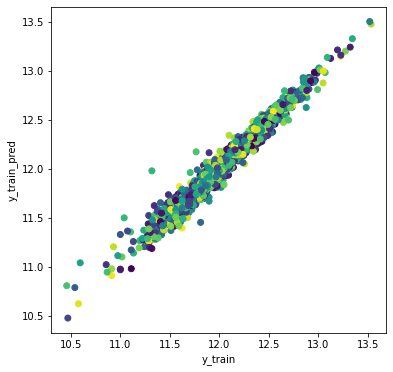

In [87]:
plt.rcParams['figure.figsize'] = (6,6)
plt.scatter(y_train, y_train_pred, c = colors, marker = "o")
plt.xlabel('y_train')
plt.ylabel('y_train_pred')
plt.show()

##### 2. XGBoost Regressor

In [89]:
scaler = MinMaxScaler()
enc = OneHotEncoder(handle_unknown='ignore')

In [90]:
clt = ColumnTransformer(transformers=[('num', scaler, numerical), 
                                      ('cat', enc, categorical)])

In [91]:
steps=[('preprocessor', clt),
        ('xgb', XGBRegressor())]

In [92]:
model = Pipeline(steps)

In [93]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['LotFrontage', 'LotArea',
                                                   'OverallQual', 'OverallCond',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'TotRmsAbvGrd',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'YrSold']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignor...
                              gamma=0, gpu_id=-1, i

In [94]:
y_train_pred = model.predict(X_train)

In [95]:
y_test_pred = model.predict(X_test)

***Model Evaluation***

In [96]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [97]:
print("MAE: " + str(mean_absolute_error(y_train, y_train_pred)))

print("MSE: " + str(mean_squared_error(y_train, y_train_pred)))

print("R2 score: " + str(r2_score(y_train, y_train_pred)))

MAE: 0.010607429995169988
MSE: 0.00022551976191453665
R2 score: 0.9985856434781497


***Feature Importance***

In [98]:
import shap
from sklearn import tree

In [99]:
shap.initjs()

In [100]:
explainer = shap.TreeExplainer(model.steps[1][1])
shap_values = explainer.shap_values(model[:-1].transform(X_train))

In [101]:
shap.force_plot(explainer.expected_value, shap_values[0,:], features = model[:-1].transform(X_train)[0,:], \
                feature_names = X_train.columns)

**Feature importance**

- Feature importance helps you estimate how much each feature of your data contributed to the model’s prediction. After performing feature importance tests, you can figure out which features are making the most impact on your model’s decision making. You can act on this by removing the features which have a low impact on the model’s predictions and focussing on making improvements to the more significant features. This can improve model performance significantly.
- There are many ways to calculate feature importance. Some of the basic methods which use statmodels and scikit-learn

***Shapely Additive Explanations (ShAP)*** ShAPley Additive explanations is a visualization tool that can be used for making a machine learning model more explainable by visualizing its output. It can be used for explaining the prediction of any model by computing the contribution of each feature to the prediction.
- To calculate the Shapley Values for one feature: This value is the average marginal contribution of a feature value across all the possible combinations of features. The computation time increases exponentially with the number of features. One solution to keep the computation time manageable is to compute contributions for only a few samples of the possible coalitions.
- The above explanation shows features each contributing to push the model output from the base value (the average model output over the training dataset we passed) to the model output. Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue.

##### Hyperparameter Tuning

In [102]:
learning_rate = [float(x) for x in np.linspace(0.02, 0.52, 6)]
n_estimators = [int(x) for x in np.linspace(20, 200, 4)]
#n_estimators = [5,10,50,250,500]
colsample_bytree = [0.5, 0.7, 1]
max_depth = [3, 6, 10]
min_child_weight = [1, 3, 6]
gamma = [0, 0.2, 0.5]
reg_lambda = [0.01, 1, 100]

In [103]:
random_grid = {'xgb__learning_rate': learning_rate,
              'xgb__n_estimators': n_estimators,
              'xgb__colsample_bytree': colsample_bytree,
              'xgb__max_depth': max_depth,
              'xgb__min_child_weight': min_child_weight,
              'xgb__gamma': gamma,
              'xgb__reg_lambda': reg_lambda}

In [104]:
from sklearn.model_selection import RandomizedSearchCV

In [105]:
search = RandomizedSearchCV(estimator = model, param_distributions = random_grid,
                           n_iter = 100, cv = 3, verbose = 1, n_jobs = -1)

In [106]:
search.fit(X_train, y_train)
search.best_params_
search.best_score_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               MinMaxScaler(),
                                                                               ['LotFrontage',
                                                                                'LotArea',
                                                                                'OverallQual',
                                                                                'OverallCond',
                                                                                'YearRemodAdd',
                                                                                'MasVnrArea',
                                                                                'BsmtUnfSF',
                                                                         

{'xgb__reg_lambda': 0.01,
 'xgb__n_estimators': 200,
 'xgb__min_child_weight': 3,
 'xgb__max_depth': 3,
 'xgb__learning_rate': 0.12000000000000001,
 'xgb__gamma': 0,
 'xgb__colsample_bytree': 1}

0.879289029655625

##### Retraining the model with tuned parameters

In [107]:
scaler = MinMaxScaler()
enc = OneHotEncoder(handle_unknown='ignore')

In [108]:
clt = ColumnTransformer(transformers=[('num', scaler, numerical), 
                                      ('cat', enc, categorical)])

In [109]:
steps=[('preprocessor', clt),
        ('xgb', XGBRegressor(reg_lambda = 0.01, n_estimators = 200, min_child_weight = 3, max_depth = 3,
                             learning_rate = 0.12, gamma = 0, colsample_bytree = 1))]

In [110]:
model = Pipeline(steps)

In [111]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['LotFrontage', 'LotArea',
                                                   'OverallQual', 'OverallCond',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'TotRmsAbvGrd',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'YrSold']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignor...
                              gamma=0, gpu_id=-1, i

In [112]:
y_train_pred = model.predict(X_train)

In [113]:
y_test_pred = model.predict(X_test)

***Model Evaluation***

In [114]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [115]:
print("MAE: " + str(mean_absolute_error(y_train, y_train_pred)))

print("MSE: " + str(mean_squared_error(y_train, y_train_pred)))

print("R2 score: " + str(r2_score(y_train, y_train_pred)))

MAE: 0.052610237294428694
MSE: 0.005446038590741379
R2 score: 0.9658449435487488


<u />*Train scores: before hyperparameter tuning*<u />

MSE: 0.000225 and R2 score: 0.9985

<u />*Train scores: after hyperparameter tuning*<u />

MSE: 0.0007438 and R2 score: 0.9953

In [116]:
# Plot to visualize relationship between y_train and y_train_pred

import matplotlib.pyplot as plt
%matplotlib inline

In [117]:
N = len(X_train)
colors = np.random.rand(N)

Text(0.5, 0, 'y_train')

Text(0, 0.5, 'y_train_pred')

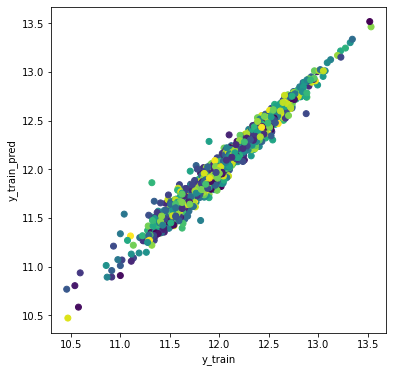

In [118]:
plt.rcParams['figure.figsize'] = (6,6)
plt.scatter(y_train, y_train_pred, c = colors, marker = "o")
plt.xlabel('y_train')
plt.ylabel('y_train_pred')
plt.show()

<AxesSubplot:ylabel='Density'>

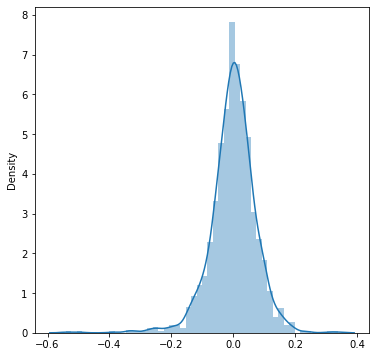

In [119]:
# Histogram plot of the residuals

sns.distplot((y_train - y_train_pred))

##### Exponential transformation 

*The np.expm1() is a numpy library method that returns an exponential value -1 of each element provided inside a numpy array as the output.*

In [120]:
y_test_pred = np.expm1(y_test_pred)

In [121]:
y_test_pred

array([127482.36, 162741.22, 179819.81, ..., 167669.75, 109301.9 ,
       243629.28], dtype=float32)

***XGboost works much better in terms of the coefficinet of determination (r2 score) than Gradient Boosting algorithm.***
- XGBoost uses decision trees as base learners; combining many weak learners to make a strong learner. As a result it is referred to as an ensemble learning method since it uses the output of many models in the final prediction. 
- It is an ideal blend of software and hardware optimization techniques to yield prevalent outcomes by using fewer computing resources in shortest amount of time.
- It is Highly Flexible and uses the power of parallel processing. 
- It is faster than Gradient Boosting and supports regularization
- It is designed to handle missing data with its in-build features. The user can run a cross-validation after each iteration.

With these advantages and the above results, we can say that this is the go-to algorithm for this dataset.

### *Writing test predictions into csv*

In [122]:
Id = test_raw.Id.values

In [123]:
y_test_pred

array([127482.36, 162741.22, 179819.81, ..., 167669.75, 109301.9 ,
       243629.28], dtype=float32)

In [124]:
df_pred = pd.DataFrame(Id, columns = ['Id'])

In [125]:
df_pred['SalePrice'] = y_test_pred

In [126]:
df_pred

,Id,SalePrice
0,1461,127482.359375
1,1462,162741.218750
2,1463,179819.812500
3,1464,189830.937500
4,1465,179229.828125
...,...,...
1454,2915,78200.046875
1455,2916,89011.414062
1456,2917,167669.750000
1457,2918,109301.898438


In [127]:
df_pred.to_csv('submission.csv', index = False)

*Name: Kirtana Kirtivasan* <br />
*Cohort: MSIS* <br />
*Course: Machine Learning* <br />
*Project: House Prices - Advanced Regression Techniques* <br />

In [128]:
from IPython.display import Image

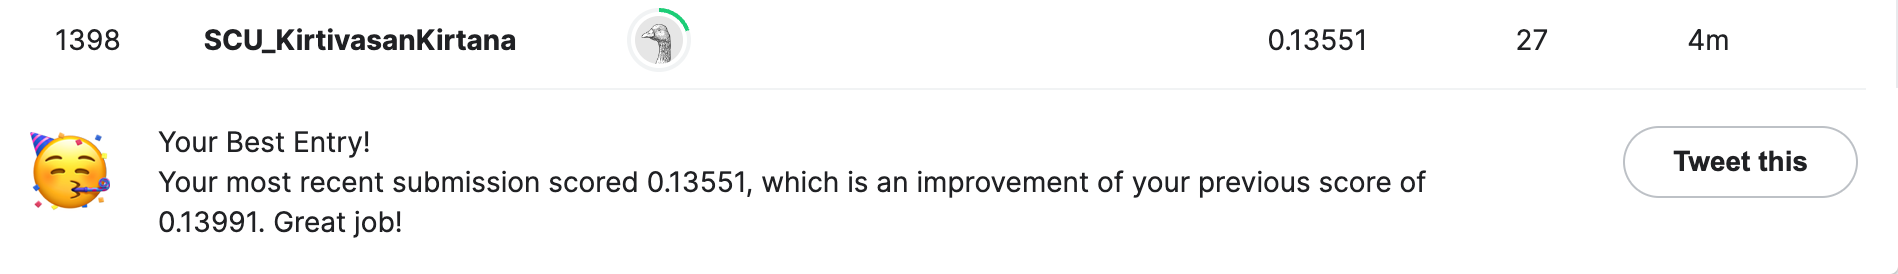

In [129]:
Image("Screenshot_score.png")